# Deepsignal-Plant Analysis
<p>Deepsignal-Plant can only detect 5mC methylation; detection is in all contexts</p>

### Imports and settings

In [1]:
import pandas as pd

In [2]:
pd.options.display.float_format = '{:20,.2f}'.format

### Read in the data

In [3]:
data_file = '/home/bayraktar/PycharmProjects/basecalling_scripts/data/nanopore_data/C_call_mods_size.frequency.tsv'
header = ['Chr', 'position', 'strand', 'pos_in_strand', 'prob_o_sum', 'prob_1_sum', 'count_modified', 'count_unmodified', 'coverage', 'modification_frequency', 'kmer']
df = pd.read_csv(data_file, sep='\t', names=header)

In [4]:
def check_kmer(kmer):
    if kmer[3] == 'G':
        context = 'CG'
    elif kmer[4] == 'G':
        context = 'CHG'
    else:
        context = 'CHH'
    return context

In [5]:
df['context'] = df['kmer'].apply(check_kmer)

In [6]:
df

,Chr,position,strand,pos_in_strand,prob_o_sum,prob_1_sum,count_modified,count_unmodified,coverage,modification_frequency,kmer,context
0,1,4358311,-,-1,35.92,0.08,0,36,36,0.00,AGCTG,CHG
1,1,4358307,-,-1,36.98,0.02,0,37,37,0.00,GTCTC,CHH
2,1,4358305,-,-1,35.97,1.03,1,36,37,0.03,CTCTG,CHG
3,1,4358298,-,-1,37.00,0.00,0,37,37,0.00,TTCCT,CHH
4,1,4358297,-,-1,36.99,0.01,0,37,37,0.00,TCCTG,CHG
...,...,...,...,...,...,...,...,...,...,...,...,...
19502809,8,1923674,-,-1,6.47,1.53,1,7,8,0.12,TCCGA,CG
19502810,8,2818467,+,-1,13.08,1.92,1,14,15,0.07,TCCGG,CG
19502811,8,2818675,+,-1,15.14,1.86,1,16,17,0.06,TGCGG,CG
19502812,8,2818872,+,-1,11.59,1.42,1,12,13,0.08,TGCGG,CG


In [7]:
min_cov = (df['coverage'] >= 4)
modified = (df['coverage'] >= 4) & (df['count_modified'] >= 3)

### Coverage

In [8]:
df['coverage'].describe()

count          19,502,814.00
mean                   32.69
std                    20.12
min                     1.00
25%                    26.00
50%                    30.00
75%                    36.00
max                   879.00
Name: coverage, dtype: float64

<Axes: >

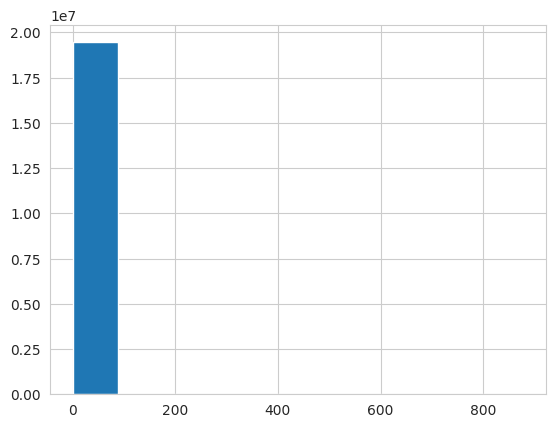

In [9]:
df['coverage'].hist()

<Axes: >

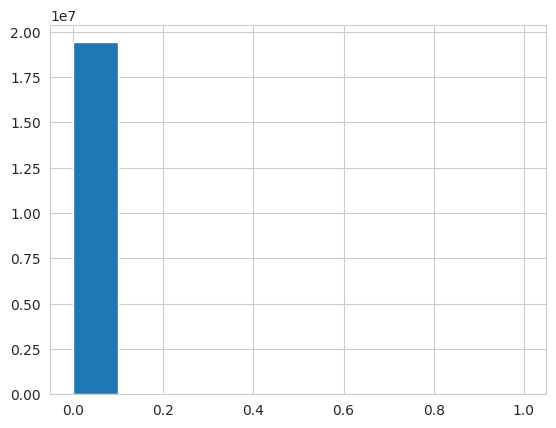

In [10]:
df['modification_frequency'].hist()

In [11]:
len(df[min_cov])

19497234

In [12]:
df[min_cov]['context'].value_counts()

context
CHH    10562997
CG      5057422
CHG     3876815
Name: count, dtype: int64

In [13]:
len(df[modified])

150729

In [14]:
df[modified]['context'].value_counts()

context
CG     94436
CHH    44463
CHG    11830
Name: count, dtype: int64